<a href="https://colab.research.google.com/github/Ranjitkumarmuduli/Smart-watch-price-prediction/blob/main/SWP_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries and dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#dataset path
path='/content/drive/MyDrive/Smart Watch Price Prediction/Smart watch prices.csv'

In [5]:
#Read csv file
df=pd.read_csv(path)

In [6]:
#First Five rows of the dataset
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [7]:
#Last Five rows of the dataset
df.tail()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159
378,TicWatch,Pro 3,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,454 x 454,50,72,Yes,Yes,Yes,$299


I saw that in the dataset 379 rows and 13 columns present.

#Let's go to Do some preprocessing.

In [8]:
#Let's see what type of columns are present in our dataset.
df.columns

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size (inches)', 'Resolution', 'Water Resistance (meters)',
       'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC',
       'Price (USD)'],
      dtype='object')

In [9]:
#shape of the dataset
df.shape

(379, 13)

In [10]:
#let's find the data type
print(df.dtypes)

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object


I saw that all the columns are object type except one column display size

In [11]:
#Check the number of unique value
df.select_dtypes(include="object").nunique()

Brand                         42
Model                        137
Operating System              35
Connectivity                   5
Display Type                  27
Resolution                    36
Water Resistance (meters)      7
Battery Life (days)           30
Heart Rate Monitor             1
GPS                            2
NFC                            2
Price (USD)                   50
dtype: int64

Here we get a clarity that column model is too many different values so we can remove the columns for better clarify to ML algorithm.

Let's drop the columns "Model"

In [12]:
#Drop the model columns
df.drop(columns="Model", inplace= True)
#Let's check the shape of the dataset
df.shape

(379, 12)

In [13]:
#finding missing values
print(df.isna().sum())

Brand                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64


In every columns atleast one missing value is present so let's leave that we can deal with the missing values later .

We saw that values of the column "Price (USD)" is present with the USD symbol and some where comma also so we 1st remove those two the convert the column to numeric column.

#Let's remove the USD symbol and comma from the price columns.

In [14]:
#Remove USD symbol and comma from price column.
df["Price (USD)"]=df["Price (USD)"].str.replace(",","").str.replace("$"," ").str.replace(" ","")

# Convert the Price(USD) column to numeric values
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'])
df.head()

<ipython-input-14-74988255bd59>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price (USD)"]=df["Price (USD)"].str.replace(",","").str.replace("$"," ").str.replace(" ","")


,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,399.0
1,Samsung,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,249.0
2,Garmin,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,399.0
3,Fitbit,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,229.0
4,Fossil,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,299.0


In [15]:
#Check the dtype of all columns
print(df.dtypes)

Brand                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                  float64
dtype: object


#Let's check the unique value of all columns


In [16]:
def get_unique_value(dataset):
  unique_values={}
  for col in dataset.columns:
    unique_values[col]=dataset[col].unique().tolist()
  return unique_values

In [17]:
print(get_unique_value(df))

{'Brand': ['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei', 'TicWatch', 'Oppo', 'Amazfit', 'Skagen', 'Withings', 'Timex', 'Suunto', 'Mobvoi', 'Polar', 'Ticwatch', 'Xiaomi', 'Honor', 'LG', nan, 'Casio', 'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia', 'Sony', 'Zepp', 'Realme', 'Matrix', 'Kate Spade', 'Diesel', 'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer', 'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola', 'Nokia'], 'Operating System': ['watchOS', 'Wear OS', 'Garmin OS', 'Fitbit OS', 'HarmonyOS', 'ColorOS', 'Amazfit OS', nan, 'Withings OS', 'Polar OS', 'Tizen OS', 'Hybrid OS', 'Lite OS', 'Tizen', 'Suunto OS', 'Proprietary OS', 'Proprietary', 'LiteOS', 'Android Wear', 'MIUI for Watch', 'Custom OS', 'Fossil OS', 'MIUI', 'RTOS', 'MyKronoz OS', 'Nubia OS', 'Mi Wear OS', 'Zepp OS', 'Realme OS', 'Matrix OS', 'Android OS', 'Casio OS', 'Skagen OS', 'Timex OS', 'MIUI For Watch', 'Android'], 'Connectivity': ['Bluetooth, Wi-Fi, Cellular', 'Bluetooth, Wi-Fi', 'Bl

#segment the operating system

In [18]:
df["Operating System"].unique()

array(['watchOS', 'Wear OS', 'Garmin OS', 'Fitbit OS', 'HarmonyOS',
       'ColorOS', 'Amazfit OS', nan, 'Withings OS', 'Polar OS',
       'Tizen OS', 'Hybrid OS', 'Lite OS', 'Tizen', 'Suunto OS',
       'Proprietary OS', 'Proprietary', 'LiteOS', 'Android Wear',
       'MIUI for Watch', 'Custom OS', 'Fossil OS', 'MIUI', 'RTOS',
       'MyKronoz OS', 'Nubia OS', 'Mi Wear OS', 'Zepp OS', 'Realme OS',
       'Matrix OS', 'Android OS', 'Casio OS', 'Skagen OS', 'Timex OS',
       'MIUI For Watch', 'Android'], dtype=object)

In [19]:
def segment_os(os):
  if pd.isnull(os):
    return 'Unknown'
  elif 'watchOS' in os:
    return 'watchOS'
  elif 'Wear OS' in os or 'Android Wear' in os:
    return 'Wear OS'
  elif 'Garmin' in os:
    return 'Garmin OS'
  elif 'Fitbit' in os:
    return 'Fitbit OS'
  elif 'Tizen' in os:
    return 'Tizen OS'
  elif 'Proprietary' in os:
    return 'Proprietary OS'
  else:
    return 'Other'

In [20]:
df['Operating System']=df['Operating System'].apply(segment_os)

In [21]:
print(df['Operating System'].unique())

['watchOS' 'Wear OS' 'Garmin OS' 'Fitbit OS' 'Other' 'Unknown' 'Tizen OS'
 'Proprietary OS']


<Axes: >

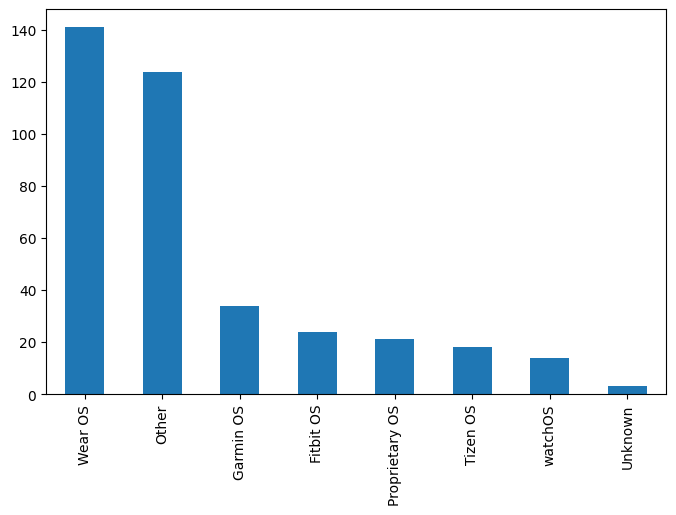

In [22]:
plt.figure(figsize=(8,5))
df['Operating System'].value_counts().plot(kind='bar')

#Segment the display type


In [23]:
df['Display Type'].unique()

array(['Retina', 'AMOLED', 'IPS LCD', nan, 'TFT LCD',
       'Memory-in-pixel (MIP)', 'Super AMOLED', 'LCD', 'Analog',
       'Transflective', 'OLED', 'Gorilla Glass', 'MIP', 'P-OLED',
       'transflective', 'PMOLED', 'TFT',
       'Sunlight-visible, transflective memory-in-pixel (MIP)', 'E-Ink',
       'E-ink', 'Sunlight-visible', 'Color Touch', 'IPS', 'Dual Layer',
       'TFT-LCD', 'STN LCD', 'Monochrome', 'Memory LCD'], dtype=object)

In [24]:
def segment_display_type(display_type):
    if pd.isnull(display_type):
        return 'Unknown'
    elif 'AMOLED' in display_type:
        return 'AMOLED'
    elif 'IPS LCD' in display_type or 'IPS' in display_type:
        return 'IPS LCD'
    elif 'LCD' in display_type:
        return 'LCD'
    elif 'OLED' in display_type:
        return 'OLED'
    elif 'TFT' in display_type:
        return 'TFT'
    elif 'E-Ink' in display_type or 'E-ink' in display_type:
        return 'E-Ink'
    elif 'PMOLED' in display_type:
        return 'PMOLED'
    elif 'STN LCD' in display_type:
        return 'STN LCD'
    elif 'Monochrome' in display_type:
        return 'Monochrome'
    elif 'Memory LCD' in display_type:
        return 'Memory LCD'
    else:
        return 'Other'

In [25]:
df['Display Type']=df['Display Type'].apply(segment_display_type)

<Axes: >

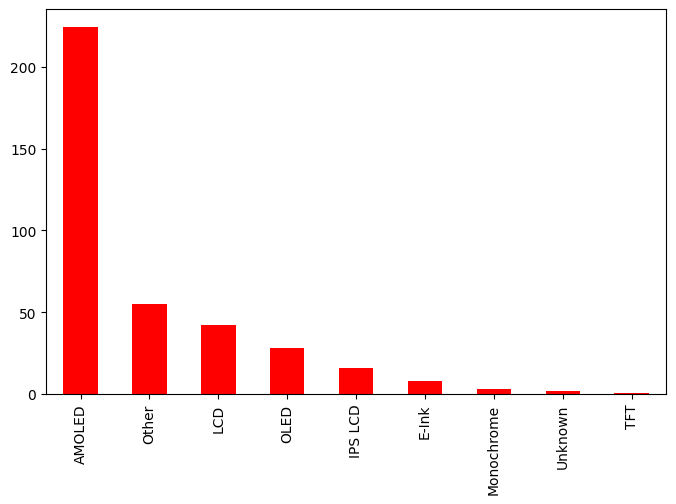

In [26]:
plt.figure(figsize=(8,5))
df['Display Type'].value_counts().plot(kind='bar',color='red')

We saw that in column 'Heart Rate Monitor' has only one unique value.so reomve the column.

#Remove 'Heart Rate Monitor'

In [27]:
#check shape
df.shape

(379, 12)

In [28]:
df.drop(columns='Heart Rate Monitor',inplace=True)
df.shape

(379, 11)

#Segment the Brand

In [29]:
df['Brand'].unique()

array(['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei',
       'TicWatch', 'Oppo', 'Amazfit', 'Skagen', 'Withings', 'Timex',
       'Suunto', 'Mobvoi', 'Polar', 'Ticwatch', 'Xiaomi', 'Honor', 'LG',
       nan, 'Casio', 'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia',
       'Sony', 'Zepp', 'Realme', 'Matrix', 'Kate Spade', 'Diesel',
       'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer',
       'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola',
       'Nokia'], dtype=object)

In [30]:
def segment_brand(brand):
    if pd.isnull(brand):
        return 'Unknown'
    elif 'Apple' in brand:
        return 'Apple'
    elif 'Samsung' in brand:
        return 'Samsung'
    elif 'Fitbit' in brand:
        return 'Fitbit'
    elif 'Huawei' in brand:
        return 'Huawei'
    elif 'TicWatch' in brand or 'Ticwatch' in brand:
        return 'TicWatch'
    elif 'Polar' in brand:
        return 'Polar'
    elif 'Xiaomi' in brand:
        return 'Xiaomi'
    elif 'LG' in brand:
        return 'LG'
    elif 'Casio' in brand:
        return 'Casio'
    elif 'Moto' in brand or 'Motorola' in brand:
        return 'Motorola'
    elif 'Sony' in brand:
        return 'Sony'
    else:
        return 'Other'

In [31]:
df['Brand']=df['Brand'].apply(segment_brand)

<Axes: >

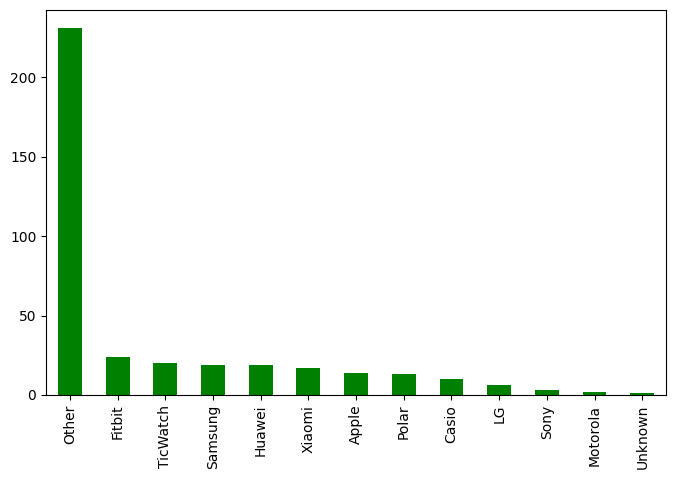

In [32]:
plt.figure(figsize=(8,5))
df['Brand'].value_counts().plot(kind='bar',color='green')

#Segment the Resolution

In [33]:
df['Resolution'].unique()

array(['396 x 484', '450 x 450', '416 x 416', '336 x 336', '466 x 466',
       '360 x 360', '372 x 430', '454 x 454', nan, '240 x 240',
       '390 x 390', '394 x 324', '240 x 201', '368 x 448', '400 x 400',
       '324 x 394', '320 x 320', '348 x 442', '402 x 476', '480 x 480',
       '176 x 176', '300 x 300', '200 x 200', '280 x 280', '128 x 128',
       '240 x 198', '280 x 456', '328 x 328', '960 x 192', '348 x 250',
       '320 x 300', '320 x 302', '228 x 172', '160 x 160', '260 x 260',
       '126 x 36', '326 x 326'], dtype=object)

In [34]:
def segment_resolution(resolution):
    if pd.isnull(resolution):
        return 'Unknown'
    res = resolution.split(' x ')
    width = int(res[0])
    height = int(res[1])
    if width < 200 or height < 200:
        return 'Low'
    elif width < 400 or height < 400:
        return 'Medium'
    elif width < 800 or height < 800:
        return 'High'
    else:
        return 'Very high'


In [35]:
df['Resolution']=df['Resolution'].apply(segment_resolution)

<Axes: >

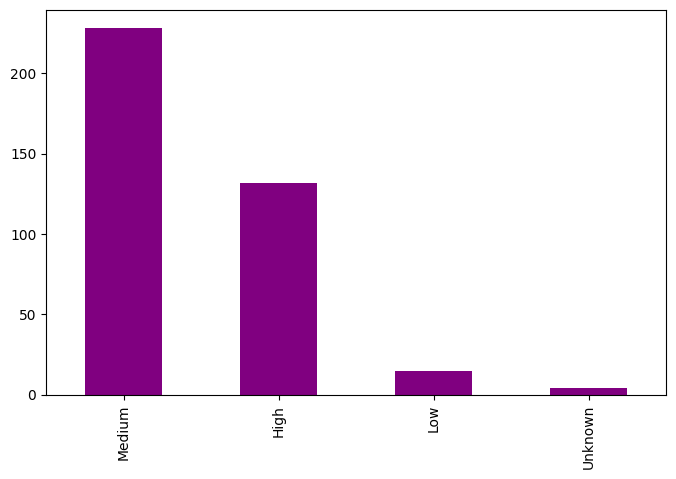

In [36]:
plt.figure(figsize=(8,5))
df['Resolution'].value_counts().plot(kind='bar',color='purple')

#Segment the Battery Life

In [37]:
df['Battery Life (days)'].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '3', '45',
       '5', '10', '48', '7', '16', '9', '25', '72', '60', '56', nan, '70',
       '1', '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

In [38]:
def segment_battery_life(battery_life):
    if pd.isnull(battery_life):
        return 'Unknown'
    elif battery_life == '48 hours':
        return '1-10'
    elif battery_life == '1.5':
        return '1-10'
    elif battery_life == 'Unlimited':
        return '>30'
    else:
        try:
            days = int(battery_life)
            if days >= 1 and days <= 10:
                return '1-10'
            elif days >= 11 and days <= 20:
                return '11-20'
            elif days >= 21 and days <= 30:
                return '21-30'
            else:
                return '>30'
        except ValueError:
            return 'Unknown'

In [39]:
df['Battery Life (days)']=df['Battery Life (days)'].apply(segment_battery_life)

<Axes: >

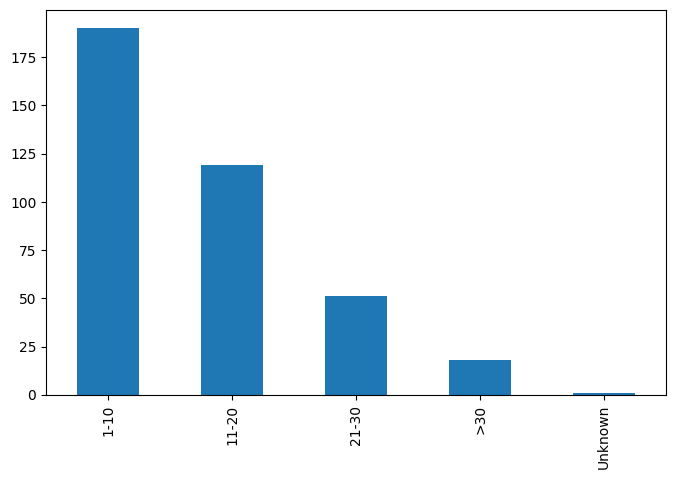

In [40]:
plt.figure(figsize=(8,5))
df['Battery Life (days)'].value_counts().plot(kind='bar')

#Segment the Water resistance(meters)

In [41]:
df['Water Resistance (meters)'].unique()

array(['50', '30', '100', '1.5', nan, 'Not specified', '200', '10'],
      dtype=object)

In [42]:
def segment_water_resistance(water_resistance):
    if pd.isnull(water_resistance) or water_resistance == 'Not specified':
        return 'Unknown'
    elif water_resistance == '1.5':
        return 'Splash resistant'
    else:
        depth = int(water_resistance)
        if depth >= 0 and depth <= 50:
            return '50m or less'
        elif depth > 50 and depth <= 100:
            return '51m - 100m'
        else:
            return 'More than 100m'

In [43]:
df['Water Resistance (meters)']=df['Water Resistance (meters)'].apply(segment_water_resistance)

<Axes: >

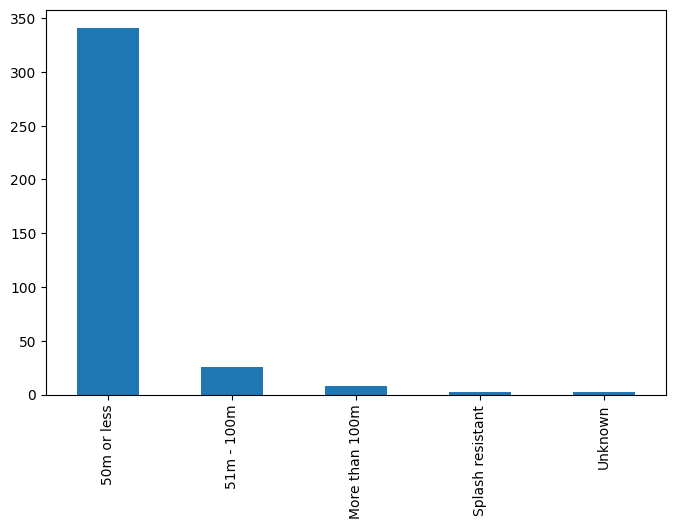

In [44]:
plt.figure(figsize=(8,5))
df['Water Resistance (meters)'].value_counts().plot(kind='bar')

#Exploratory Data Analysis

In [45]:
#Let's check the shape
df.shape

(379, 11)

In [46]:
#Check the number of unique value
df.select_dtypes(include='object').nunique()

Brand                        13
Operating System              8
Connectivity                  5
Display Type                  9
Resolution                    4
Water Resistance (meters)     5
Battery Life (days)           5
GPS                           2
NFC                           2
dtype: int64

In [47]:
list(df.columns)

['Brand',
 'Operating System',
 'Connectivity',
 'Display Type',
 'Display Size (inches)',
 'Resolution',
 'Water Resistance (meters)',
 'Battery Life (days)',
 'GPS',
 'NFC',
 'Price (USD)']

In [48]:
df.select_dtypes(include="float64").columns

Index(['Display Size (inches)', 'Price (USD)'], dtype='object')

In [49]:
#list of categorical variables to plot
cat_vars=['Brand','Operating System','Connectivity','Display Type','Resolution'
,'Water Resistance (meters)','Battery Life (days)','GPS','NFC']

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<function matplotlib.pyplot.show(close=None, block=None)>

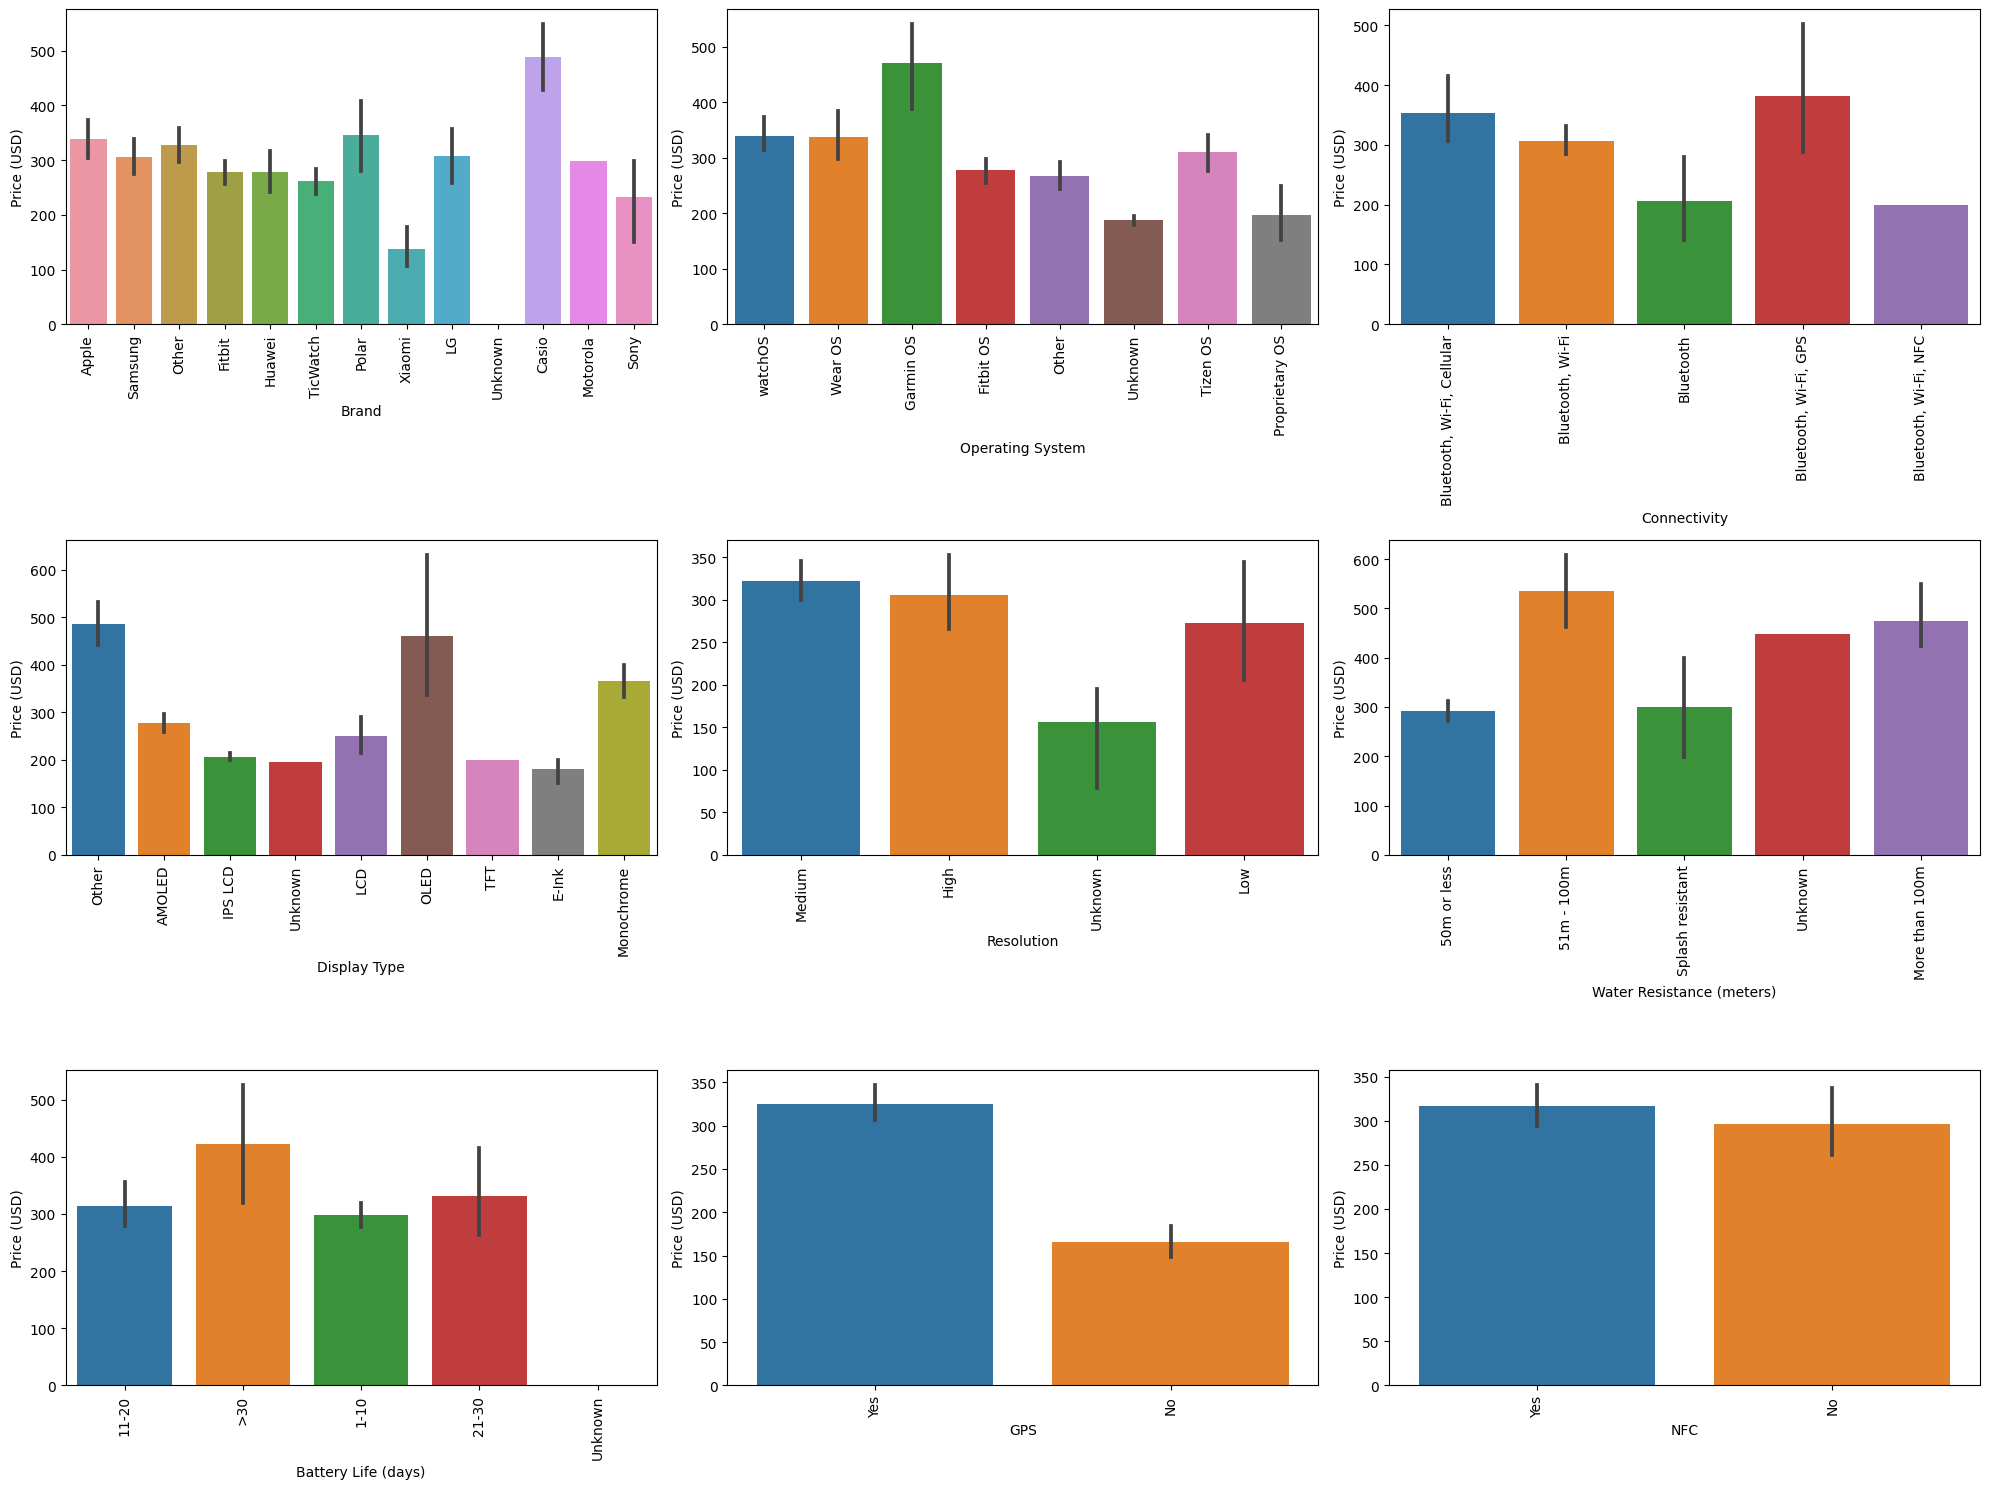

In [50]:
#Create figure with subplots
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(20,15))
axs = axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate(cat_vars):
  sns.barplot(x=var, y='Price (USD)', data=df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

#adjust spacing between subplot
fig.tight_layout()


#show plot
plt.show

<Axes: xlabel='Display Size (inches)'>

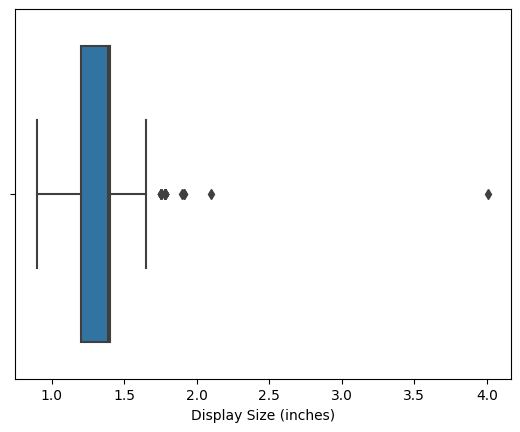

In [51]:
sns.boxplot(x=df['Display Size (inches)'])

<Axes: xlabel='Display Size (inches)'>

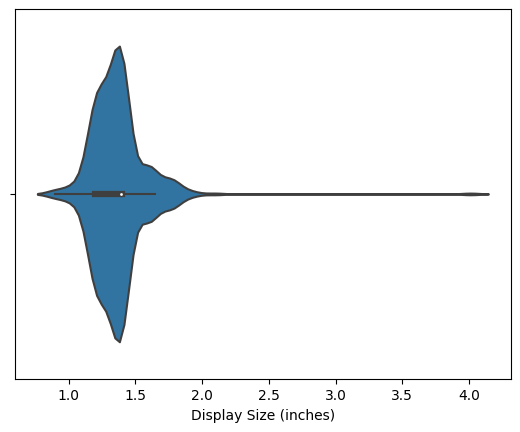

In [52]:
sns.violinplot(x=df["Display Size (inches)"])

<Axes: xlabel='Display Size (inches)', ylabel='Count'>

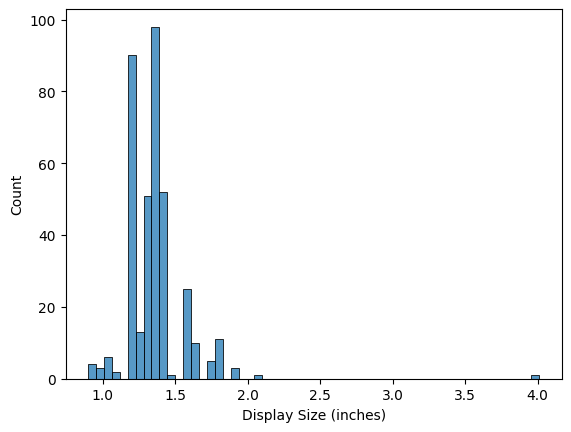

In [53]:
sns.histplot(x=df['Display Size (inches)'])

In [54]:
#check missing value
check_missing= df.isnull().sum()*100/df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=True)

Connectivity             0.263852
GPS                      0.263852
NFC                      0.263852
Price (USD)              0.263852
Display Size (inches)    0.791557
dtype: float64

In [55]:
df.shape

(379, 11)

In [56]:
#Drop the missing values
df.dropna(inplace=True)
df.shape

(376, 11)

In [57]:
#Recheck missing value
check_missing = df.isnull().sum()*100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

#Label encoding for object datatypes

In [58]:
#Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

  #print the column name and the unique values
  print(f"{col}: {df[col].unique()}")

Brand: ['Apple' 'Samsung' 'Other' 'Fitbit' 'Huawei' 'TicWatch' 'Polar' 'Xiaomi'
 'LG' 'Casio' 'Motorola' 'Sony']
Operating System: ['watchOS' 'Wear OS' 'Garmin OS' 'Fitbit OS' 'Other' 'Unknown' 'Tizen OS'
 'Proprietary OS']
Connectivity: ['Bluetooth, Wi-Fi, Cellular' 'Bluetooth, Wi-Fi' 'Bluetooth'
 'Bluetooth, Wi-Fi, GPS' 'Bluetooth, Wi-Fi, NFC']
Display Type: ['Other' 'AMOLED' 'IPS LCD' 'LCD' 'OLED' 'TFT' 'E-Ink' 'Monochrome']
Resolution: ['Medium' 'High' 'Low' 'Unknown']
Water Resistance (meters): ['50m or less' '51m - 100m' 'Splash resistant' 'Unknown' 'More than 100m']
Battery Life (days): ['11-20' '>30' '1-10' '21-30']
GPS: ['Yes' 'No']
NFC: ['Yes' 'No']


In [59]:
from sklearn import preprocessing

#loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
  
  #Initialize a Labelencoder object
  label_encoder=preprocessing.LabelEncoder()

  #Fit the encoder to the unique values in the clumn
  label_encoder.fit(df[col].unique())

  #Transform the column using the encoder
  df[col]= label_encoder.transform(df[col])
  
  #Print the column name and the unique encided values
  print(f"{col}: {df[col].unique()}")

Brand: [ 0  8  6  2  3 10  7 11  4  1  5  9]
Operating System: [7 6 1 0 2 5 4 3]
Connectivity: [2 1 0 3 4]
Display Type: [6 0 2 3 5 7 1 4]
Resolution: [2 0 1 3]
Water Resistance (meters): [0 1 3 4 2]
Battery Life (days): [1 3 0 2]
GPS: [1 0]
NFC: [1 0]


In [60]:
df.head()

,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),GPS,NFC,Price (USD)
0,0,7,2,6,1.90,2,0,1,1,1,399.0
1,8,6,2,0,1.40,0,0,3,1,1,249.0
2,6,1,1,0,1.30,0,0,1,1,0,399.0
3,2,0,1,0,1.58,2,0,0,1,1,229.0
4,6,6,1,0,1.28,0,0,2,1,1,299.0


#Removing outliers using Z-score

In [61]:
from scipy import stats

#define a function to remove outlier using z-score for only selected numerical columns
def remove_outliers(df, cols, treshold=3):
  #loop over each selected solumn
  for col in cols:
    #calculate z-score for each data point in selected solumn
    z= np.abs(stats.zscore(df[col]))
    #remove rows with z-score greater that threshold in selected column
    df= df[(z < treshold) | (df[col].isnull())]
  return df

In [62]:
selected_cols = ['Display Size (inches)']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(374, 11)

#Correlation Heatmap

<Axes: >

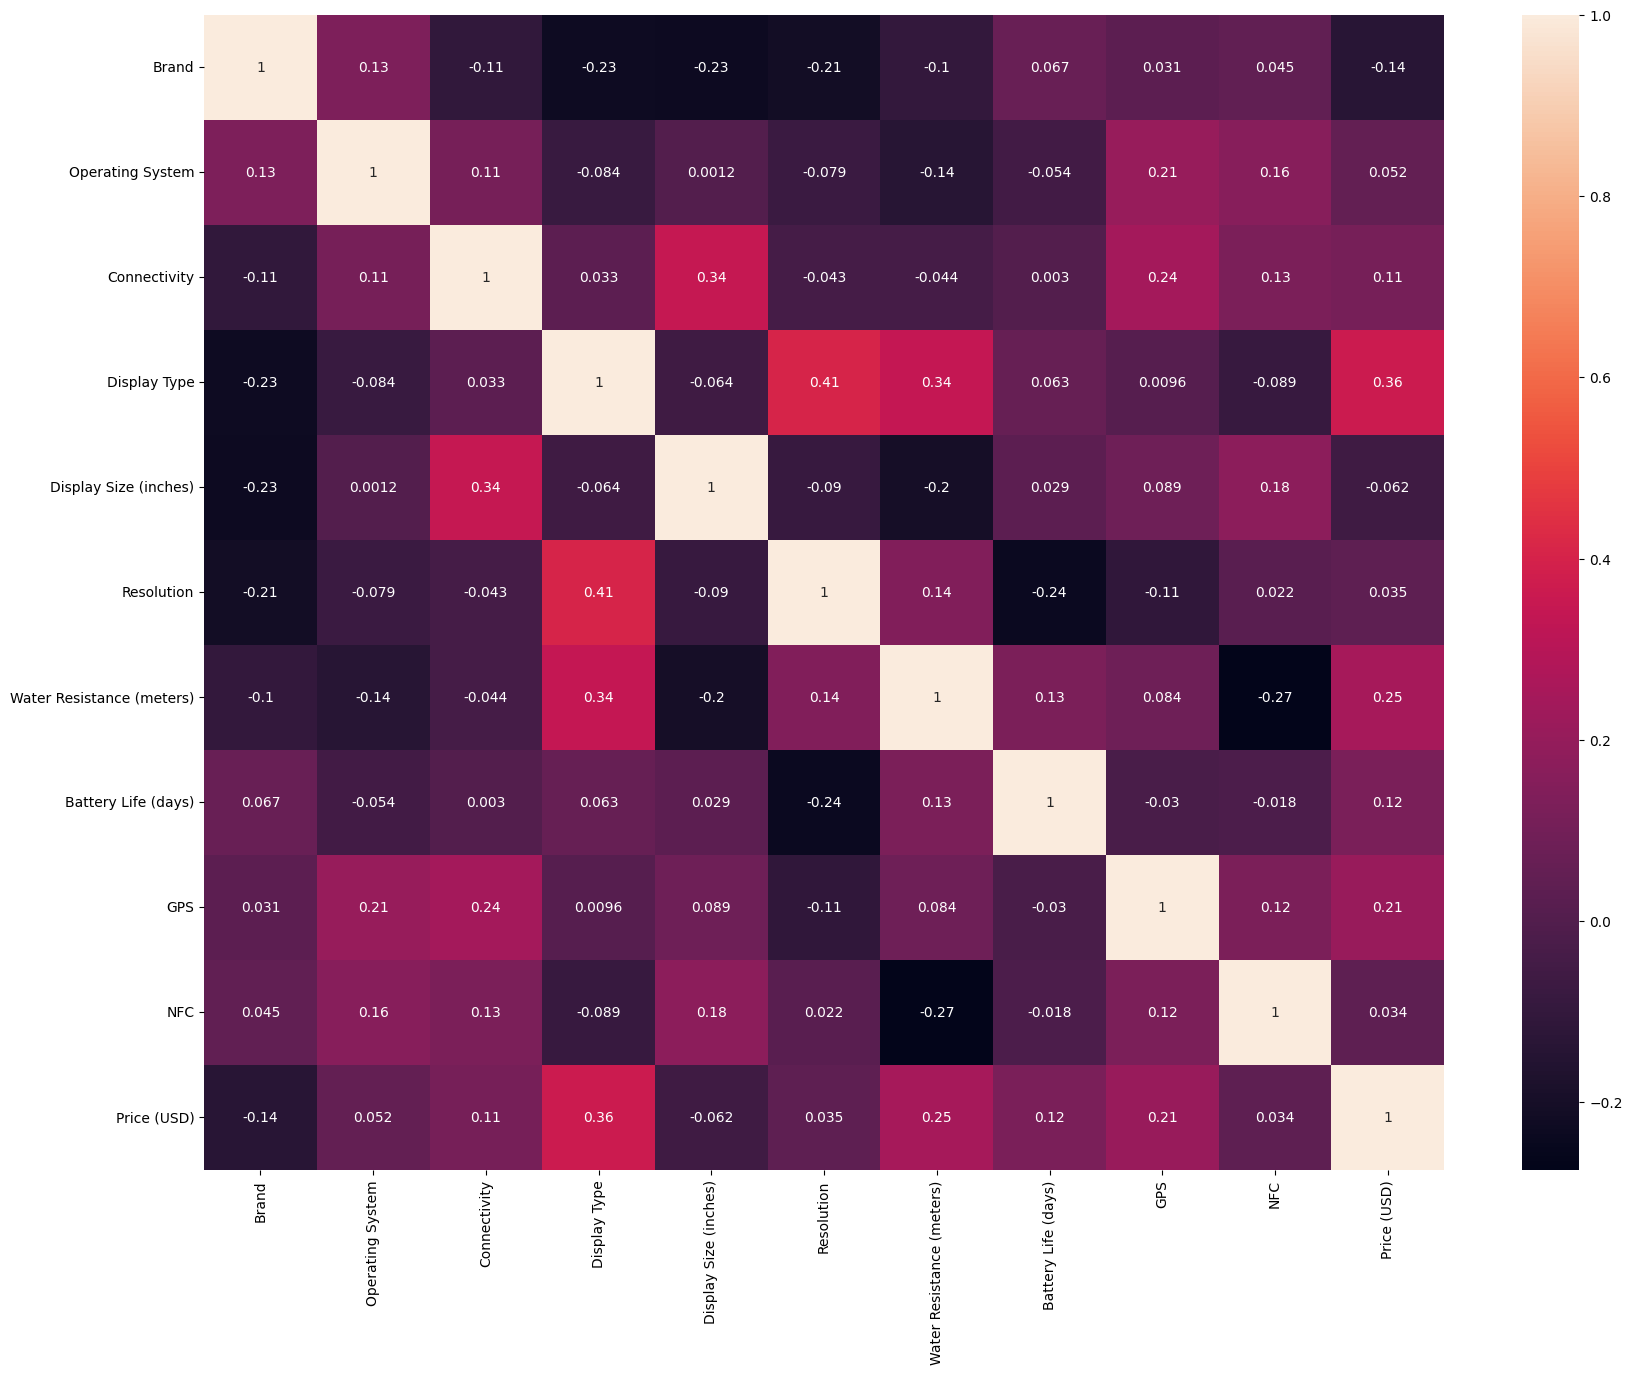

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(df_clean.corr(),annot=True)

#Train Test Split

In [64]:
X= df_clean.drop('Price (USD)', axis=1)
y = df_clean['Price (USD)']

In [65]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Dicision Tree regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#Create a DecisionTreeRegressor object
dtree= DecisionTreeRegressor()

#Define the hyperparameters to tune and their values
param_grid={'max_depth':[2, 4, 6, 8],
            'min_samples_split':[2, 4, 6, 8],
            'min_samples_leaf':[1, 2, 3,4],
            'max_features': ['aotu','sqrt','log2']}

#create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

#Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=6, max_features='auto', min_samples_leaf=1, min_samples_split=6)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_split=6,
                      random_state=0)

In [68]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is{}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is{}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is54.29975370674141
MSE is 7938.312275354595
R2 score is0.6889144275851471
RMSE score is 89.09720688862583


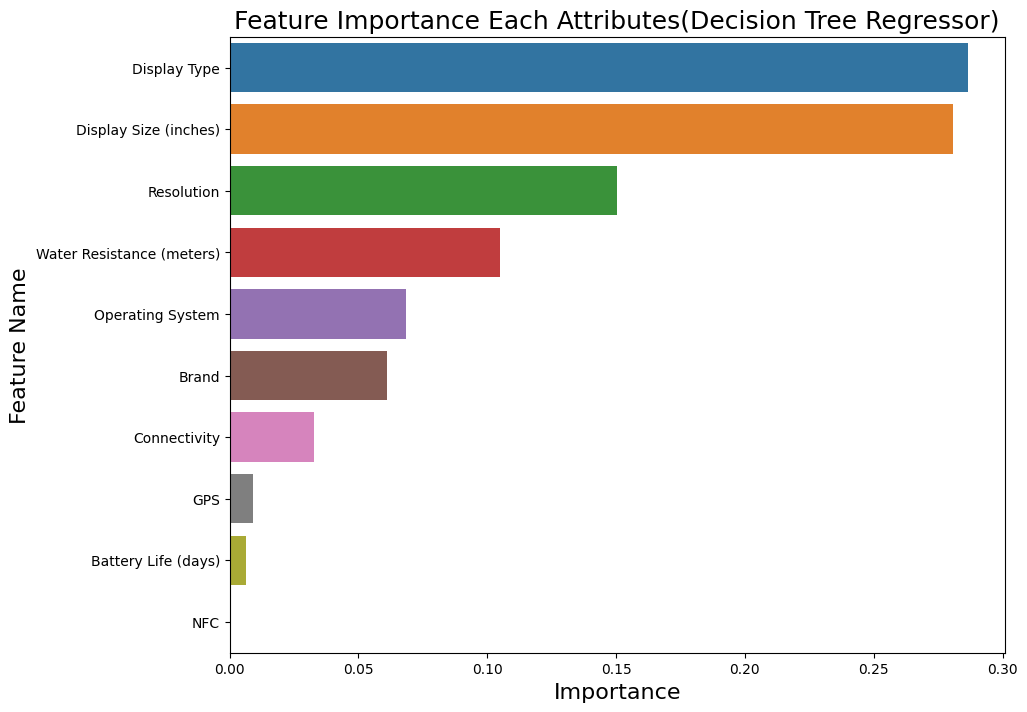

In [72]:
imp_df = pd.DataFrame({"Feature Name": X_train.columns,
                       "Importance": dtree.feature_importances_})
fi = imp_df.sort_values(by= 'Importance', ascending=False)
fi2 = fi.head(10)

plt.figure(figsize = (10,8))
sns.barplot(data=fi2, x= 'Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes(Decision Tree Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

In [74]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.2 MB/s eta 0:00:00


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


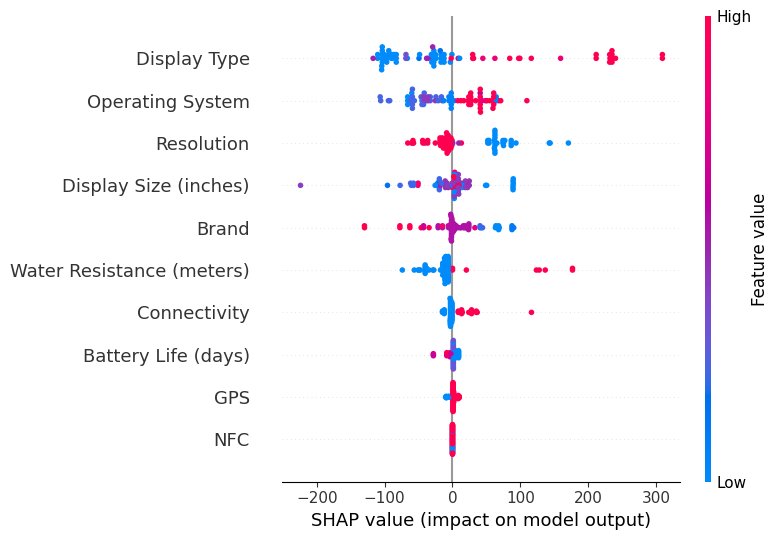

In [75]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

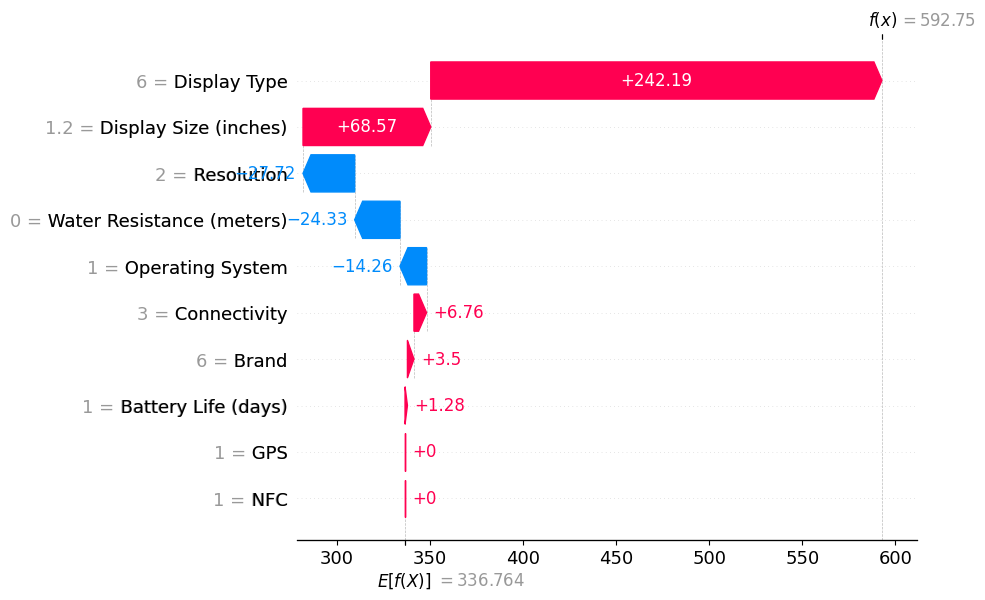

In [76]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

#Random Forest Regrssor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Create a random forest regressor object
rf=RandomForestRegressor

#Define the hyperparameters grid
param_grid = {
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','sqrt']
}

#create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

#Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

#Print the best hyperparameters
print('Best hyperparameters:',grid_search.best_params_)